# HIDDEN MARKOV NEURAL NETWORK: FLAG example

## Import libraries

In [16]:
import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F

import pickle

import numpy as np

import matplotlib.pyplot as plt

import random

from sklearn.decomposition import PCA

import BayesianNetwork

## Data processing

In [17]:
# Set the seed to guarantee reproducibility
seed_number = 123

random.seed(seed_number)
torch.manual_seed(seed_number)
np.random.seed(seed_number)

The file "vtflag.mpg" was downloaded from:

- https://www.cc.gatech.edu/cpl/projects/videotexture/SIGGRAPH2000/index.htm

In [18]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])/126.

cap = cv2.VideoCapture(0)

capture = cv2.VideoCapture(r'vtflag.mpg')
frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
print('Frame count:', frame_count)

width  = 200
height = 208

FLAG = np.zeros((416, width*height))

_, frame = capture.read(cv2.COLOR_BGR2GRAY)

for i in range(0, 416):
    frame[30:60,95:200,:] = frame[0:30,95:200,:]
    grayframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)/126.
    
    FLAG[i, :]  = grayframe.reshape((width*height))
    
#     print('Position:', capture.get(cv2.CAP_PROP_POS_FRAMES))
    _, frame = capture.read()

Frame count: 416


In [19]:
# Dimensionality reduction with PCA
pca = PCA(0.999)

pca.fit(FLAG)
train_FLAG = pca.transform(FLAG)

In [20]:
x = train_FLAG[0:300, :]
y = train_FLAG[1:301, :]

## Set the hyper parameters for the training

In [21]:
# sample size
sample_size    = 36
# batch size, here we are considering the full batch
minibatch_size = 36
# number of epochs
epocs          = 10 # optimal 150
# we are sliding of one only meaning that at time 1 we
# have frames 1:36, at time 2 we have frames 2:37, and so on...
sliding = 1
# number of sequential trainings
T = 300

###########################################################
# Set the network structure
# Depth
L = 5
# Structure of the hidden units
architecture = np.array([130, 500, 20, 500, 130])

# Kernel parameter of the HMNN
pi      = 0.75
alpha_k = 0.75
sigma_k = np.exp(2)
c       = np.exp(8)

# Mixture weight for the variational dropconnect
p       = 1.0

## Training procedure

In [22]:
# Loss function
loss_function = torch.nn.MSELoss(reduction = "sum")

HMMNET = BayesianNetwork.torchHHMnet(architecture, alpha_k, sigma_k, c, pi, p, loss_function, sample_size, minibatch_size, epocs, T, sliding, workers = 1)

HMMNET.forward_pass(x, y, 1e-4)

Time  1
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  17605.52629087538  and Data score  2425.5161732929955
Time  2
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6031.49146981065  and Data score  2118.631387227869
Time  3
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6050.148407415822  and Data score  1750.7231740435166
Time  4
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6040.387354131585  and Data score  1484.6360475847753
Time  5
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6018.055098460528  and Data score  1361.8124116796396
Time  6
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6014.356929639319  and Data score  1282.7464489470944
Time  

Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6005.420841626831  and Data score  780.8676209691371
Time  51
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6005.1243525206  and Data score  803.8267656472041
Time  52
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  5998.869231599226  and Data score  801.6417783399714
Time  53
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6008.947957459276  and Data score  917.2338968200374
Time  54
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6009.152696512466  and Data score  864.6630123531977
Time  55
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6003.540884907855  and Data score  884.8949624240009
Time  56
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch 

Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6010.0530280229805  and Data score  880.4803776709477
Time  101
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6006.442156945582  and Data score  904.8024357140384
Time  102
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6018.071803076603  and Data score  879.9727040794182
Time  103
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6010.268521382935  and Data score  886.6176028084258
Time  104
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6003.508018724272  and Data score  853.8190114245933
Time  105
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6009.7932062467735  and Data score  840.8275034099889
Time  106
Epoch

Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6000.990375802834  and Data score  790.8996951542632
Time  150
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6006.14214920035  and Data score  802.8413616774063
Time  151
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  5998.902710887633  and Data score  790.4761873107237
Time  152
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  5999.179339346327  and Data score  774.6558190776238
Time  153
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6001.372722898878  and Data score  807.3865122819012
Time  154
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6009.253055204773  and Data score  765.2731897145507
Time  155
Epoch  1
Epoch  2
Epoch  3

Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6006.730919789468  and Data score  756.012262763972
Time  199
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6008.635139517345  and Data score  815.7306575805416
Time  200
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6006.440874994974  and Data score  733.9917574976698
Time  201
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6003.682299826806  and Data score  758.3480899957805
Time  202
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6014.078633628771  and Data score  723.0592475010233
Time  203
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6002.10435669077  and Data score  747.9531942602163
Time  204
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5


Epoch  8
Epoch  9
Epoch  10
Prior score  6000.212492653906  and Data score  699.4203435846877
Time  248
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6000.596994641863  and Data score  678.7146950651353
Time  249
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6004.613335252241  and Data score  665.895510568495
Time  250
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6000.287671774339  and Data score  658.0355900952499
Time  251
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6006.712975107162  and Data score  655.7157633029157
Time  252
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6004.220360662782  and Data score  631.7637919315121
Time  253
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7

Epoch  8
Epoch  9
Epoch  10
Prior score  6002.407957262414  and Data score  90.52565387846444
Time  297
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  5997.879845087932  and Data score  81.44083706416798
Time  298
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6002.632353328556  and Data score  33.72587767896907
Time  299
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6000.18736679471  and Data score  22.677886467740283
Time  300
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Prior score  6004.727415958583  and Data score  8.28967180764247


The above simulation took around 20 min on a machine with CPU: 1.80GHz i7-8565U and Ram: 16Gb

## Plot the forecasted flags

Increase the epochs for a finer performance

/home/lrimella/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


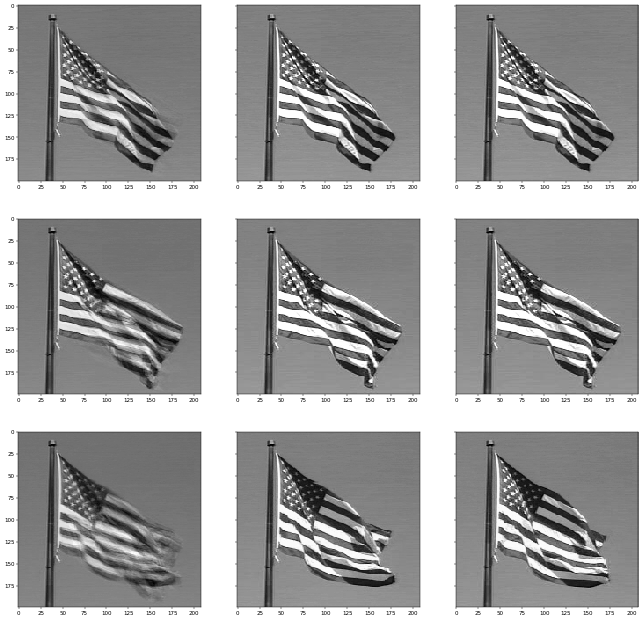

In [24]:
fig, ax = plt.subplots(3,3, figsize=(20, 20), dpi=40, sharey=True)

ax[0,0].imshow(pca.inverse_transform(HMMNET.model_list[115].performance(torch.tensor(train_FLAG[150, :]) ).data.numpy()).reshape(width, height), cmap = plt.get_cmap('gray') )
ax[0,1].imshow(pca.inverse_transform(train_FLAG[150, :]).reshape(width, height), cmap = plt.get_cmap('gray') )
ax[0,2].imshow(pca.inverse_transform(train_FLAG[151, :]).reshape(width, height), cmap = plt.get_cmap('gray') )

ax[1,0].imshow(pca.inverse_transform(HMMNET.model_list[125].performance(torch.tensor(train_FLAG[160, :])).data.numpy()).reshape(width, height), cmap = plt.get_cmap('gray') )
ax[1,1].imshow(pca.inverse_transform(train_FLAG[160, :]).reshape(width, height), cmap = plt.get_cmap('gray') )
ax[1,2].imshow(pca.inverse_transform(train_FLAG[161, :]).reshape(width, height), cmap = plt.get_cmap('gray') )

ax[2,0].imshow(pca.inverse_transform(HMMNET.model_list[170].performance(torch.tensor(train_FLAG[205, :])).data.numpy()).reshape(width, height), cmap = plt.get_cmap('gray') )
ax[2,1].imshow(pca.inverse_transform(train_FLAG[205, :]).reshape(width, height), cmap = plt.get_cmap('gray') )
ax[2,2].imshow(pca.inverse_transform(train_FLAG[206, :]).reshape(width, height), cmap = plt.get_cmap('gray') )


fig.show()